In [21]:
model="unet-128-6ch-L-512-ACT-leaky-relu-LOSS-dice+rms-MET-acc+iou"

In [22]:
import os
from PIL import Image, ImageDraw, ImageFont
import imageio

def create_gif_from_images(folder_path, duration=0.5):
    # Get all image filenames in the folder, sorted by epoch number
    
    for root_out, dirs_out, files_out in os.walk(folder_path):
        # Get all image filenames in the current directory, sorted by epoch number
        # print("-",root_out,dirs_out,files_out)
        # for dirs in dirs_out:
        for i in dirs_out:
            images = sorted([img for img in os.listdir(root_out+f"/{i}") if img.endswith(('.png')) and int(os.path.splitext(img)[0])%50==0], key=lambda x: int(os.path.splitext(x)[0]))

            print(root_out,i)
            # input()
            frames = []
            
            for img_name in images:
                epoch = os.path.splitext(img_name)[0]
                img_path = os.path.join(root_out+f"/{i}", img_name)
                image = Image.open(img_path)
                
                # Add epoch text to the image
                draw = ImageDraw.Draw(image)
                font = ImageFont.load_default(size=20)  # You can specify a font file if needed
                text = f"{epoch}"
                text_position = (10, 10)  # Position at the left corner
                draw.text(text_position, text, font=font, fill="black")
                
                frames.append(image)
            imageio.mimsave(root_out+f"/{i}.gif", frames, fps=13)

    # Save frames as a gif
    # imageio.mimsave(output_path, frames, duration=duration)
        
# Example usage
folder_path = f'compare_img/{model}'
# create_gif_from_images(folder_path)


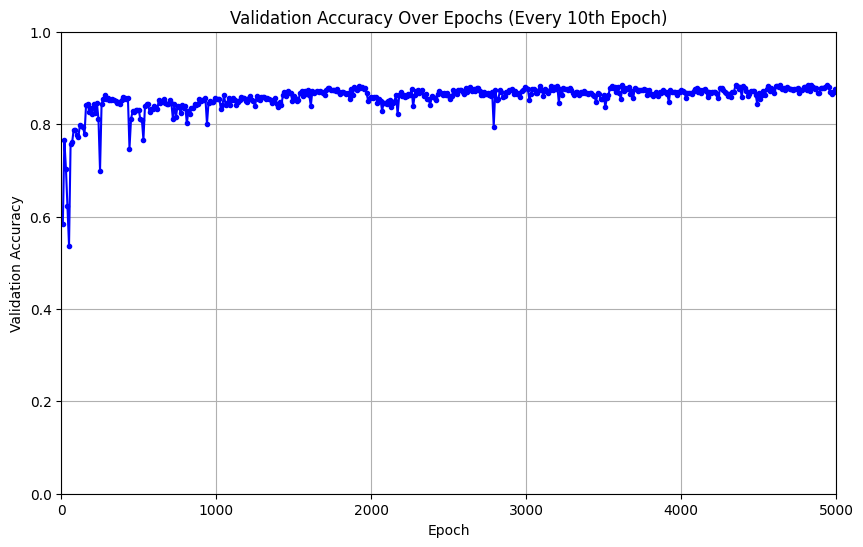

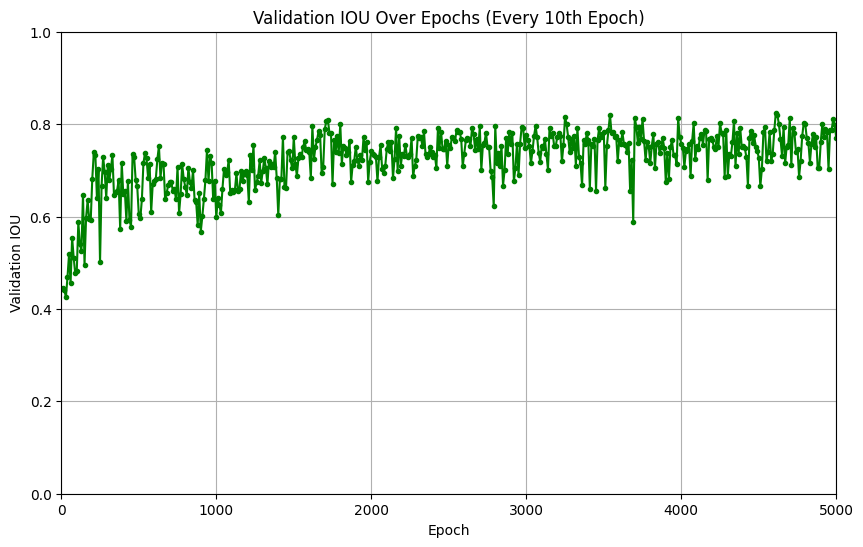

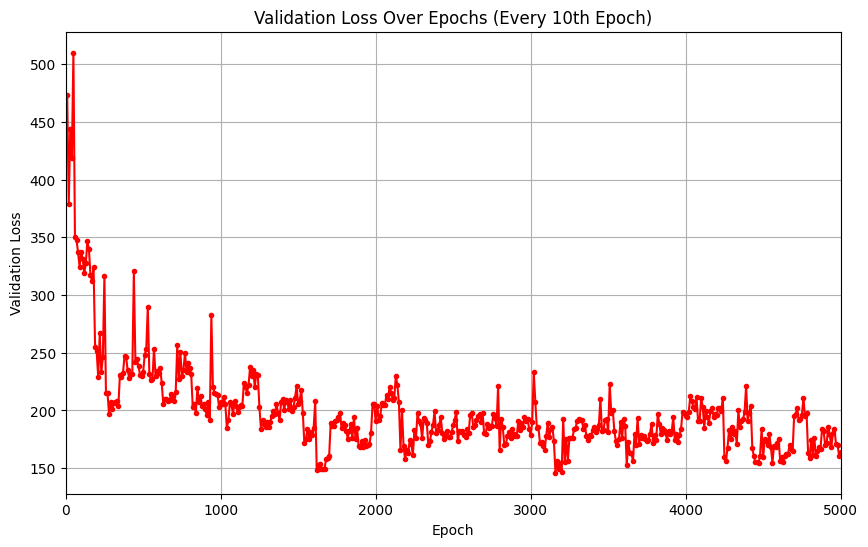

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = f'metrics/{model}.csv'
data = pd.read_csv(file_path)

# Downsampling the data to plot every 10 epochs
downsampled_data = data[data['epoch'] % 10 == 0]

# Plot for validation accuracy with y-axis range 0 to 1
plt.figure(figsize=(10, 6))
plt.plot(downsampled_data['epoch'], downsampled_data['val_acc'], marker='.', linestyle='-', color='b')
plt.title('Validation Accuracy Over Epochs (Every 10th Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.xlim(0, 5000)
plt.grid(True)
plt.show()

# Plot for validation IOU with y-axis range 0 to 1
plt.figure(figsize=(10, 6))
plt.plot(downsampled_data['epoch'], downsampled_data['val_iou'], marker='.', linestyle='-', color='g')
plt.title('Validation IOU Over Epochs (Every 10th Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Validation IOU')
plt.ylim(0, 1)
plt.xlim(0, 5000)
plt.grid(True)
plt.show()

# Plot for validation loss
plt.figure(figsize=(10, 6))
plt.plot(downsampled_data['epoch'], downsampled_data['val_loss'], marker='.', linestyle='-', color='r')
plt.title('Validation Loss Over Epochs (Every 10th Epoch)')
plt.xlabel('Epoch')
plt.xlim(0, 5000)
plt.ylabel('Validation Loss')
plt.grid(True)
plt.show()


0.8291723728179932


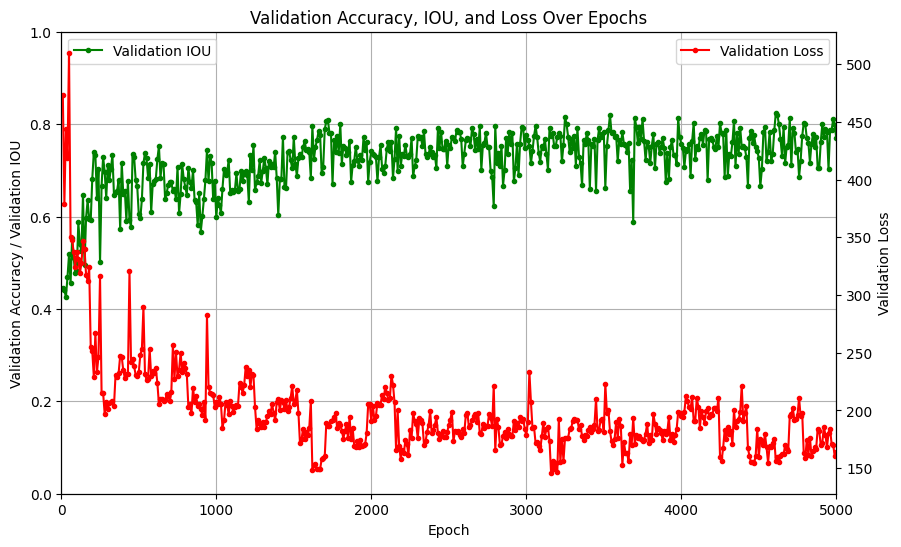

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = f'metrics/{model}.csv'
data = pd.read_csv(file_path)
print(data['val_iou'].max())

# Downsampling the data to plot every 10 epochs
downsampled_data = data[data['epoch'] % 10 == 0]


# Create a figure and axis
fig, ax1 = plt.figure(figsize=(10, 6)), plt.gca()

# Plot validation accuracy and validation IOU on the first y-axis
# ax1.plot(downsampled_data['epoch'], downsampled_data['val_acc'], marker='.', linestyle='-', color='b', label='Validation Accuracy')
ax1.plot(downsampled_data['epoch'], downsampled_data['val_iou'], marker='.', linestyle='-', color='g', label='Validation IOU')

# Set labels and limits for the first y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Accuracy / Validation IOU')
ax1.set_ylim(0, 1)
ax1.set_xlim(0, 5000)
ax1.grid(True)
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot validation loss on the second y-axis
ax2.plot(downsampled_data['epoch'], downsampled_data['val_loss'], marker='.', linestyle='-', color='r', label='Validation Loss')

# Set label and limits for the second y-axis
ax2.set_ylabel('Validation Loss')
ax2.set_xlim(0, 5000)
ax2.legend(loc='upper right')

# Set title for the figure
plt.title('Validation Accuracy, IOU, and Loss Over Epochs')

# Show the plot
plt.show()
